<a href="https://colab.research.google.com/github/20ronaldf/electiva-ciencia-datos-ETITC/blob/main/taller_CienciaDatos_EntornosV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [2]:
#instalar virtualevn
!pip install virtualenv

In [3]:
import virtualenv
virtualenv.cli_run(["data_science_env"])

In [4]:
#Activar el entorno
!source data_science_env/bin/activate

In [5]:
#Actualizo pip
!pip install --upgrade pip

In [6]:
#Usar requerements.txt para instalar las bibliotecas
!pip install -r /content/drive/MyDrive/data/requirements.txt

  Using cached seaborn-0.12.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached plotly-5.3.1-py2.py3-none-any.whl.metadata (7.4 kB)
Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Using cached plotly-5.3.1-py2.py3-none-any.whl (23.9 MB)
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2


In [7]:
#Actualizare todas las bibliotecas
!pip uninstall plotly -y
!pip install plotly

Found existing installation: plotly 5.3.1
Uninstalling plotly-5.3.1:
  Successfully uninstalled plotly-5.3.1
  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)


In [8]:
#Verificacion de las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import bokeh
import seaborn as sn

print("Todas las bibliotecas se importaron correctamente!")

Todas las bibliotecas se importaron correctamente!


In [12]:
#Cargar el conjunto de datos desde una URL p´ublica
url = "https://raw.githubusercontent.com/databricks/Spark-The-Definitive-Guide/refs/heads/master/data/retail-data/all/online-retail-dataset.csv?classId=cd0b6b9e-28f2-424f-9517-30a93a11d74a"
data = pd.read_csv(url, encoding='latin1')

# Mostrar las primeras cinco filas
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
#Verificar valores faltantes
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [14]:
#Obtener estadısticas resumidas
print(data.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [15]:
# Filtrar datos para mostrar solo ventas exitosas (sin valores negativos en la cantidad)
# Filtrar datos donde Quantity es mayor que 0
data = data[data['Quantity'] > 0]

# Verificar el resultado
print("Número de registros después del filtro:", len(data))
print("\nPrimeras filas de los datos filtrados:")
print(data.head(5))

Número de registros después del filtro: 531285

Primeras filas de los datos filtrados:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


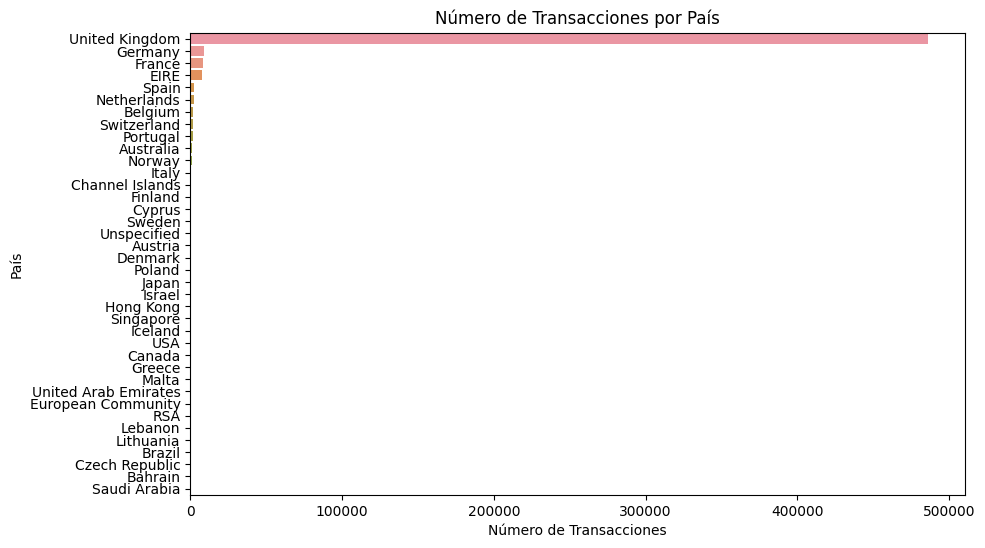

In [16]:
#Crear un gráfico para visualizar las ventas por país
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(y='Country', data=data, order=data['Country'].value_counts().
 index)
plt.title('Número de Transacciones por País')
plt.xlabel('Número de Transacciones')
plt.ylabel('País')
plt.show()

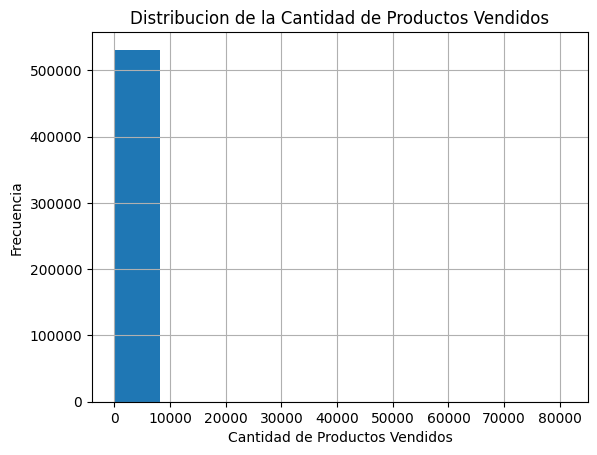

In [18]:
 # Histograma para la cantidad de ventas
data['Quantity'].hist()
plt.xlabel('Cantidad de Productos Vendidos')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la Cantidad de Productos Vendidos')
plt.show()

In [19]:
#Gráfico de Correlación entre Cantidad y Precio por País
import plotly.express as px
fig = px.scatter(data, x="Quantity", y="UnitPrice", color="Country", title="Relacíon entre Cantidad y Precio Unitario por País")
fig.show()

In [20]:
#Gráfico de Evolución de Ventas Diarias por Cantidad de Productos
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

p = figure(title="Cantidad de Productos Vendidos por Fecha", x_axis_label='Fecha', y_axis_label='Cantidad')
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
sales_per_date = data.groupby(data['InvoiceDate'].dt.date)['Quantity'].sum()
p.line(x=sales_per_date.index, y=sales_per_date.values, legend_label="VentasDiarias", line_width=2)
show(p)